In [268]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [269]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)

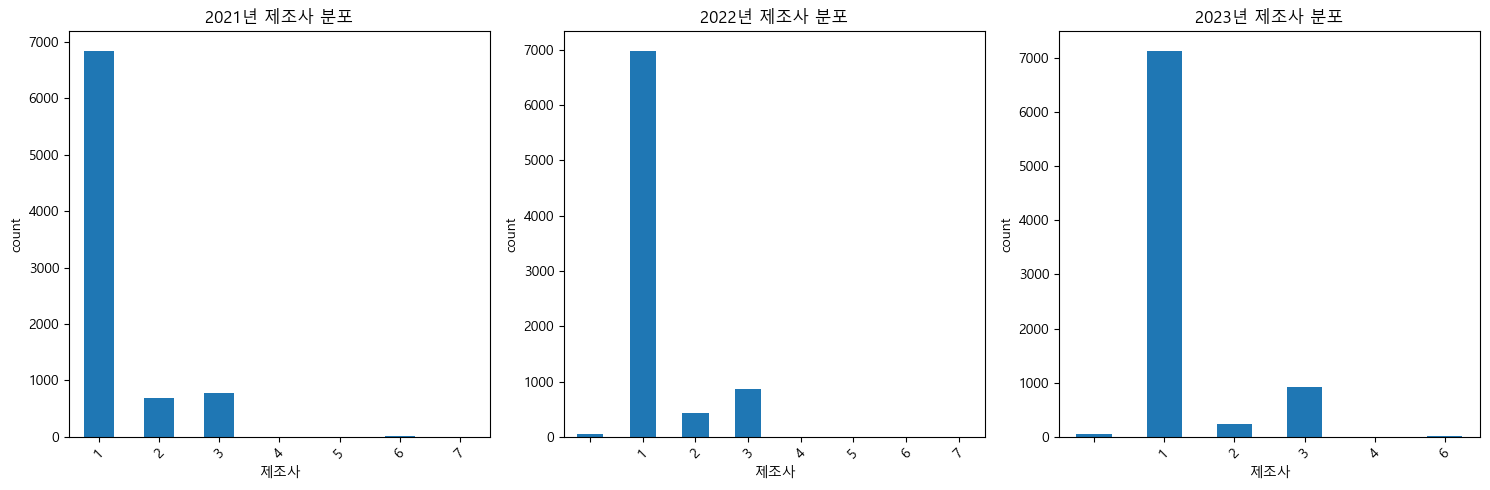

In [270]:
# 시각화 자료로 년도별 제조사 확인

# CSV 파일 읽기
phone_df = pd.read_csv('./data/phone_information.csv', low_memory=False)


# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
phone_df['brand_21'].value_counts().sort_index().plot(kind='bar')
plt.title('2021년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2022년 데이터
plt.subplot(1, 3, 2)
phone_df['brand_22'].value_counts().sort_index().plot(kind='bar')
plt.title('2022년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

# 2023년 데이터
plt.subplot(1, 3, 3)
phone_df['brand_23'].value_counts().sort_index().plot(kind='bar')
plt.title('2023년 제조사 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

# 데이터 형변환

In [271]:
# # 데이터 값을 unique로 찍어본 결과 str로 들어가있는 데이터가 있어 int로 형변환 해주어야 함
# print(phone_df['brand_21'].unique())
# print(phone_df['brand_22'].unique())
# print(phone_df['brand_23'].unique())
# print(phone_df['money_transfer_21'].unique())

# object 타입인 컬럼들 찾기
object_columns = phone_df.select_dtypes(include=['object']).columns

# object 타입 컬럼들을 숫자형으로 변환
for col in object_columns:
    phone_df.loc[:, col] = pd.to_numeric(phone_df[col], errors='coerce').astype('Int64')

# 변환된 컬럼 수 확인
print(f"\n변환된 컬럼 수: {len(object_columns)}개")
print("변환된 컬럼:", list(object_columns))


변환된 컬럼 수: 31개
변환된 컬럼: ['service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_service_23', 'data_service_23', 'use_date_23', 'brand_23']


# 값이 없는 데이터 제거

In [272]:
# NA값이 있는 컬럼들 확인

na_columns = phone_df.columns[phone_df.isna().any()].tolist()
print("NA가 있는 컬럼들:")
for col in na_columns:
    na_count = phone_df[col].isna().sum()
    print(f"{col}: {na_count}개의 NA")

print("\n전체 NA 제거 전 데이터 크기:", phone_df.shape)

# 방법 1: NA가 있는 행을 모두 제거
phone_df = phone_df.dropna()
print("\n전체 NA 제거 후 데이터 크기:", phone_df.shape)

NA가 있는 컬럼들:
service_purchase_21: 214개의 NA
money_transfer_21: 214개의 NA
cradit_card_21: 214개의 NA
call_check_22: 45개의 NA
service_purchase_22: 149개의 NA
money_transfer_22: 149개의 NA
cradit_card_22: 149개의 NA
agency_purchase_22: 5개의 NA
machine_purchase_22: 5개의 NA
phone_owner_22: 5개의 NA
data_22: 45개의 NA
dmb_22: 45개의 NA
agency_22: 45개의 NA
voice_service_22: 45개의 NA
data_service_22: 45개의 NA
use_date_22: 45개의 NA
brand_22: 45개의 NA
call_check_23: 45개의 NA
service_purchase_23: 85개의 NA
money_transfer_23: 85개의 NA
cradit_card_23: 85개의 NA
agency_purchase_23: 4개의 NA
machine_purchase_23: 4개의 NA
phone_owner_23: 4개의 NA
data_23: 45개의 NA
dmb_23: 45개의 NA
agency_23: 45개의 NA
voice_service_23: 45개의 NA
data_service_23: 45개의 NA
use_date_23: 45개의 NA
brand_23: 45개의 NA

전체 NA 제거 전 데이터 크기: (8342, 73)

전체 NA 제거 후 데이터 크기: (8071, 73)


In [273]:
# 3년간 삼성을 쓰지 않는 고객 제거

phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) ]

print("\n삼성을 쓰지 않는 사람 제거 후 데이터 크기:", phone_df.shape)


삼성을 쓰지 않는 사람 제거 후 데이터 크기: (7324, 73)


# 2021 -> 2022 (이탈자), 2022 -> 2023 (이탈자), 2021 -> 2022 -> 2023 (복귀자)

In [274]:
# 2022년도 이탈자

# 값 빼줌
samsung_users22 = phone_df[
   (phone_df['brand_21'] == 1)
]
changed_users22 = phone_df[
   (phone_df['brand_21'] == 1) & 
   (phone_df['brand_22'] != 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users22))
print('2022 이탈률: ', (len(changed_users22) / len(samsung_users22)))
print("\n변경된 사례:")
print(changed_users22[['pid', 'brand_21', 'brand_22']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_22 = changed_users22['brand_22'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_22)

브랜드 변경 고객 수: 523
2022 이탈률:  0.0789433962264151

변경된 사례:
            pid  brand_21 brand_22
1         10002         1        3
72       440001         1        2
75       440004         1        2
95       550002         1        3
105      600005         1        3
...         ...       ...      ...
8215  116530001         1        3
8216  116530002         1        3
8225  116720002         1        2
8226  116720003         1        3
8227  116720004         1        3

[523 rows x 3 columns]

변경된 브랜드 분포:
brand_22
3    308
2    212
6      2
4      1
Name: count, dtype: int64


In [275]:
# 2023년도 이탈자

changed_users23 = phone_df[
   (phone_df['brand_22'] == 1) & 
   (phone_df['brand_23'] != 1)
]

samsung_users23 = phone_df[
   (phone_df['brand_22'] == 1) 
]

print('2022 이탈률: ', (len(changed_users23) / len(samsung_users23)))

# 결과 확인
print("브랜드 변경 고객 수:", len(changed_users23))
print("\n변경된 사례:")
print(changed_users23[['pid', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_change_23 = changed_users23['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_change_23)

2022 이탈률:  0.06499044258197324
브랜드 변경 고객 수: 442

변경된 사례:
            pid brand_22 brand_23
19       100002        1        3
23       160001        1        2
39       300003        1        3
40       300004        1        3
43       310003        1        3
...         ...      ...      ...
8152  115890003        1        3
8156  115910004        1        3
8238  116990001        1        2
8242  117020001        1        2
8265  117300001        1        2

[442 rows x 3 columns]

변경된 브랜드 분포:
brand_23
3    329
2    106
4      4
6      3
Name: count, dtype: int64


In [276]:
# 2023년도 복귀자       ->     복귀자는 다시 생각해보겠지만 일단 이탈자만 생각하기로 함

returned_users = phone_df[
    (phone_df['brand_21'] == 1) &
   (phone_df['brand_22'] != 1) & 
   (phone_df['brand_23'] == 1)
]

# 결과 확인
print("브랜드 변경 고객 수:", len(returned_users))
print("\n변경된 사례:")
print(returned_users[['pid', 'brand_21', 'brand_22', 'brand_23']])

# 어떤 브랜드로 변경되었는지 분포 확인
brand_return_23 = returned_users['brand_23'].value_counts()
print("\n변경된 브랜드 분포:")
print(brand_return_23)

브랜드 변경 고객 수: 333

변경된 사례:
            pid  brand_21 brand_22 brand_23
1         10002         1        3        1
72       440001         1        2        1
75       440004         1        2        1
105      600005         1        3        1
107      620001         1        3        1
...         ...       ...      ...      ...
8098  115420002         1        2        1
8153  115910001         1        2        1
8215  116530001         1        3        1
8216  116530002         1        3        1
8225  116720002         1        2        1

[333 rows x 4 columns]

변경된 브랜드 분포:
brand_23
1    333
Name: count, dtype: int64


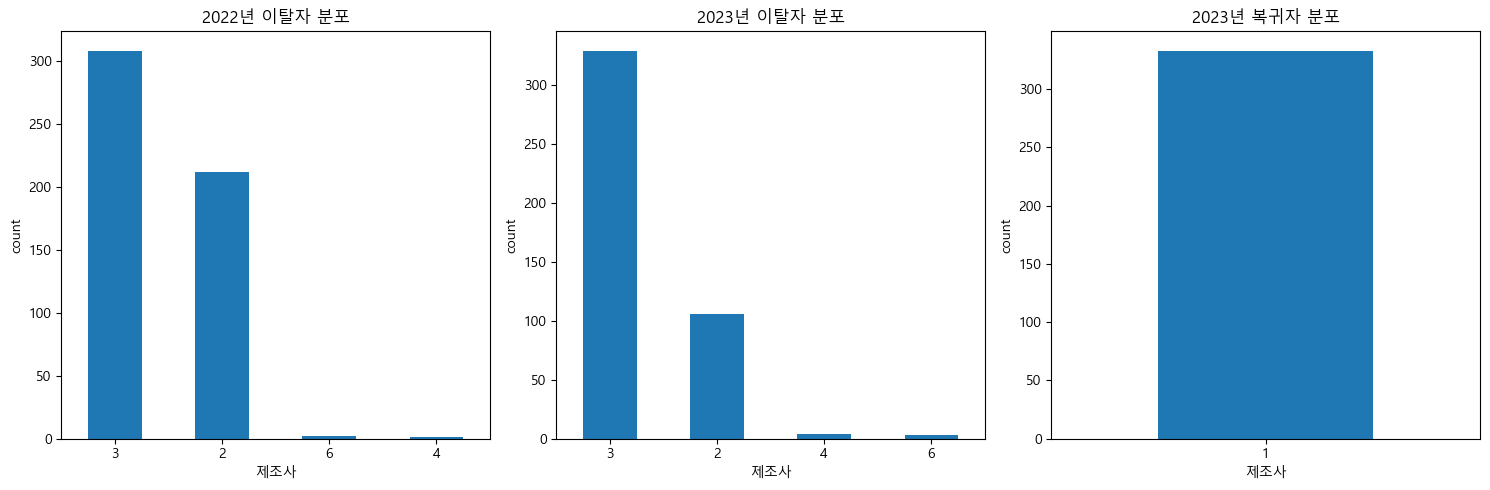

In [277]:
# 시각화 자료로 이탈자, 복귀자 확인

# 서브플롯 생성
plt.figure(figsize=(15, 5))

# 2021년 데이터
plt.subplot(1, 3, 1)
brand_change_22.plot(kind='bar')
plt.title('2022년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2022년 데이터
plt.subplot(1, 3, 2)
brand_change_23.plot(kind='bar')
plt.title('2023년 이탈자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

# 2023년 데이터
plt.subplot(1, 3, 3)
brand_return_23.plot(kind='bar')
plt.title('2023년 복귀자 분포')
plt.xlabel('제조사')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

In [278]:
total_customer = phone_df['pid'].count()
print(f'전체 인원 수 :{total_customer}')

total_samsung_21 = phone_df[phone_df['brand_21'] == 1]['brand_21'].count()
print(f'21년도 삼성 인원 수 :{total_samsung_21}')

total_samsung_22 = phone_df[phone_df['brand_22'] == 1]['brand_22'].count()
print(f'22년도 삼성 인원 수 :{total_samsung_22}')

total_samsung_23 = phone_df[phone_df['brand_23'] == 1]['brand_23'].count()
print(f'23년도 삼성 인원 수 :{total_samsung_23}')

total_chaged = len(changed_users22) + len(changed_users23)

print(f'전체 이탈자 수 :{total_chaged}')

total_merged = phone_df[phone_df['brand_23'] == 1]['brand_23'].count() + total_chaged
print(f'이탈자를 포함한 총 고객 수 :{total_merged}')

전체 인원 수 :7324
21년도 삼성 인원 수 :6625
22년도 삼성 인원 수 :6801
23년도 삼성 인원 수 :6692
전체 이탈자 수 :965
이탈자를 포함한 총 고객 수 :7657


In [279]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 8341
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pid                  7324 non-null   int64 
 1   email_21             7324 non-null   int64 
 2   messenger_21         7324 non-null   int64 
 3   blog_21              7324 non-null   int64 
 4   cloud_21             7324 non-null   int64 
 5   call_check_21        7324 non-null   int64 
 6   service_purchase_21  7324 non-null   object
 7   money_transfer_21    7324 non-null   object
 8   cradit_card_21       7324 non-null   object
 9   agency_purchase_21   7324 non-null   int64 
 10  machine_purchase_21  7324 non-null   int64 
 11  phone_owner_21       7324 non-null   int64 
 12  data_21              7324 non-null   int64 
 13  dmb_21               7324 non-null   int64 
 14  agency_21            7324 non-null   int64 
 15  voice_service_21     7324 non-null   int64 
 16  data_servic

In [280]:
phone_df['call_check_21'].value_counts()

call_check_21
2    5039
1    2285
Name: count, dtype: int64

In [281]:
phone_df.describe()

,pid,email_21,messenger_21,blog_21,cloud_21,call_check_21,agency_purchase_21,machine_purchase_21,phone_owner_21,data_21,...,email_23,messenger_23,blog_23,cloud_23,age_23,school_23,marry_23,salary_23,job_23,religion_23
count,7.324000e+03,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,...,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000
mean,4.959776e+07,1.295057,1.100355,1.932960,1.841480,1.688012,46.721737,7.801202,1.885582,2.999044,...,1.431049,1.048744,1.946068,1.863872,5.590524,3.260923,1.857728,5.311851,1.357182,1.714500
std,3.804781e+07,0.456100,0.300493,0.250108,0.365253,0.463337,18.528685,10.848381,1.368483,0.701240,...,0.495257,0.215347,0.225899,0.342948,1.699097,0.895493,0.618544,3.606020,0.479202,0.451683
min,1.000100e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.610008e+07,1.000000,1.000000,2.000000,2.000000,1.000000,34.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,5.049500e+07,1.000000,1.000000,2.000000,2.000000,2.000000,45.000000,0.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,6.000000,3.000000,2.000000,6.000000,1.000000,2.000000
75%,6.923500e+07,2.000000,1.000000,2.000000,2.000000,2.000000,56.000000,14.000000,4.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,7.000000,4.000000,2.000000,8.000000,2.000000,2.000000
max,1.183300e+08,2.000000,2.000000,2.000000,2.000000,2.000000,200.000000,110.000000,5.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,4.000000,18.000000,2.000000,2.000000


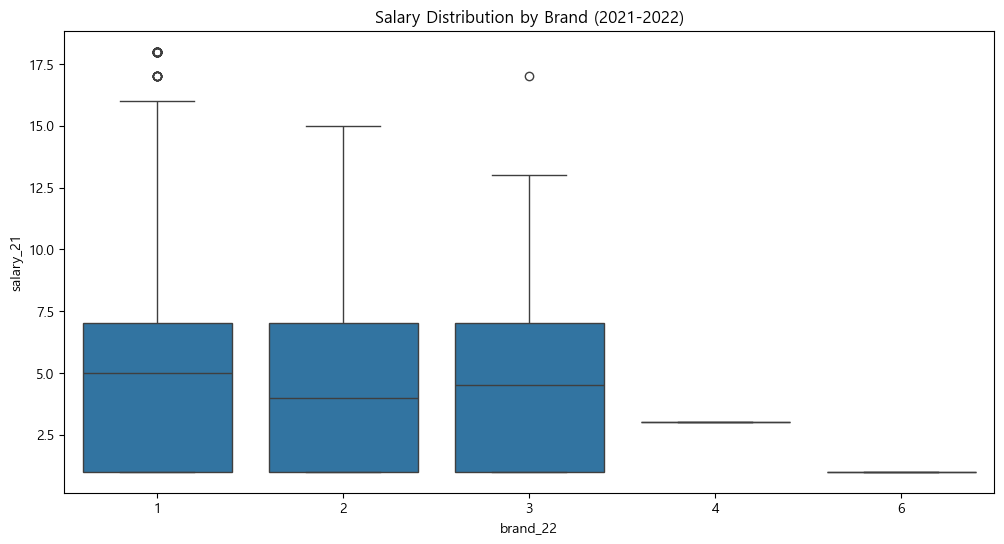

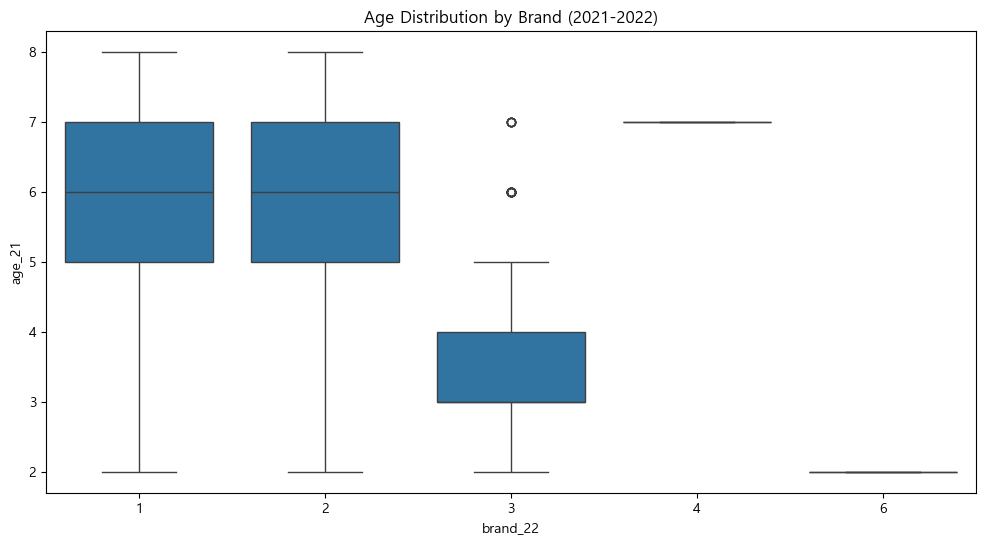

In [282]:
# 각 변수별 이탈 관계 분석 (예: salary와 이탈)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='salary_21', data=phone_df)
plt.title('Salary Distribution by Brand (2021-2022)')
plt.show()

# 연령대별 이탈 패턴
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_22', y='age_21', data=phone_df)
plt.title('Age Distribution by Brand (2021-2022)')
plt.show()

----------

# 라이브러리 정리

In [283]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 모델 학습 (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier


# 모델 평가
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
phone_df['cost_to_income_ratio'] = phone_df['agency_purchase_21'] / phone_df['salary_21']
print(phone_df.columns)

Index(['pid', 'email_21', 'messenger_21', 'blog_21', 'cloud_21',
       'call_check_21', 'service_purchase_21', 'money_transfer_21',
       'cradit_card_21', 'agency_purchase_21', 'machine_purchase_21',
       'phone_owner_21', 'data_21', 'dmb_21', 'agency_21', 'voice_service_21',
       'data_service_21', 'use_date_21', 'brand_21', 'age_21', 'school_21',
       'marry_21', 'salary_21', 'job_21', 'religion_21', 'email_22',
       'messenger_22', 'blog_22', 'cloud_22', 'call_check_22',
       'service_purchase_22', 'money_transfer_22', 'cradit_card_22',
       'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22',
       'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22',
       'use_date_22', 'brand_22', 'age_22', 'school_22', 'marry_22',
       'salary_22', 'job_22', 'religion_22', 'email_23', 'messenger_23',
       'blog_23', 'cloud_23', 'call_check_23', 'service_purchase_23',
       'money_transfer_23', 'cradit_card_23', 'agency_purchase_23',
       'mac

In [285]:
# 통신 서비스 활용도
phone_df['telecom_service_score'] = phone_df[['voice_service_21', 'data_service_21']].sum(axis=1)

# 인구통계학적 특성 조합

# 연령대 구분
phone_df['age_group'] = pd.qcut(phone_df['age_21'], q=5, labels=['20대', '30대', '40대', '50대', '60대이상'])

# 소득 수준 구분
phone_df['income_level'] = pd.cut(phone_df['salary_21'], bins=[0, 2, 5, 7, 10, phone_df['salary_21'].max()], labels=['저소득', '중저소득', '중간소득', '중상소득', '고소득'], include_lowest=True)

# 생애주기 점수 (나이, 결혼여부, 직업 조합)
phone_df['lifecycle_score'] = phone_df['age_21'] + phone_df['marry_21'] * 10 + phone_df['job_21'] * 5

# 상호작용 변수
# 전체 서비스 사용 점수
phone_df['total_service_score'] = phone_df[['email_21', 'messenger_21', 'blog_21', 
                               'cloud_21', 'call_check_21']].sum(axis=1)
# 서비스 활용도와 소득 수준의 상호작용
phone_df['service_income_interaction'] = phone_df['total_service_score'] * phone_df['salary_21']

# 연령과 서비스 활용도의 상호작용
phone_df['age_service_interaction'] = phone_df['age_21'] * phone_df['total_service_score']


# 통신비와 서비스 활용도의 상호작용
phone_df['cost_service_interaction'] = phone_df['agency_purchase_21'] * phone_df['total_service_score']

In [286]:
# 월 통신비의 소득 대비 비율
phone_df['agency_to_income_ratio'] = phone_df['agency_purchase_21'] / phone_df['salary_21']

# 기기 가격의 소득 대비 비율
phone_df['device_to_income_ratio'] = phone_df['machine_purchase_21'] / phone_df['salary_21']

# 서비스 활용도 관련 파생변수

# 전체 서비스 사용 점수
phone_df['total_service_score'] = phone_df[['email_21', 'messenger_21', 'blog_21', 'cloud_21', 'call_check_21']].sum(axis=1)

# 금융 서비스 활용도
phone_df['financial_service_score'] = phone_df[['money_transfer_21', 'cradit_card_21']].sum(axis=1)

In [287]:
# 복합지표

# pythonCopy# 고객 가치 점수

phone_df['customer_value_score'] = (phone_df['salary_21'] * 0.3 +phone_df['total_service_score'] * 0.3 +phone_df['agency_purchase_21'] * 0.2 +phone_df['use_date_21'] * 0.2)

### 이탈 위험 점수
phone_df['churn_risk_score'] = ((phone_df['cost_to_income_ratio'] * 0.4) + (phone_df['total_service_score'] / phone_df['total_service_score'].max()) * 0.3 + (phone_df['use_date_21'] / phone_df['use_date_21'].max()) * 0.3)

# 설명

#### 통신 서비스 활용도
- phone_df['telecom_service_score'] = phone_df[['voice_service_21', 'data_service_21']].sum(axis=1)


### 인구통계학적 특성 조합

##### 연령대 구분
- phone_df['age_group'] = pd.qcut(phone_df['age_21'], q=5, labels=['20대', '30대', '40대', '50대', '60대이상'])

##### 소득 수준 구분
- phone_df['income_level'] = pd.cut(phone_df['salary_21'], bins=[0, 2, 5, 7, 10, phone_df['salary_21'].max()], labels=['저소득', '중저소득', '중간소득', '중상소득', '고소득'], include_lowest=True)

#### 생애주기 점수 (나이, 결혼여부, 직업 조합)
- phone_df['lifecycle_score'] = phone_df['age_21'] + phone_df['marry_21'] * 10 + phone_df['job_21'] * 5


### 상호작용 변수

#### 서비스 활용도와 소득 수준의 상호작용
- phone_df['service_income_interaction'] = phone_df['total_service_score'] * phone_df['salary_21']

#### 연령과 서비스 활용도의 상호작용
- phone_df['age_service_interaction'] = phone_df['age_21'] * phone_df['total_service_score']

#### 통신비와 서비스 활용도의 상호작용
- phone_df['cost_service_interaction'] = phone_df['agency_purchase_21'] * phone_df['total_service_score']

### 복합 지표:

- pythonCopy# 고객 가치 점수
- phone_df['customer_value_score'] = (
- phone_df['salary_21'] * 0.3 +
- phone_df['total_service_score'] * 0.3 +
- phone_df['agency_purchase_21'] * 0.2 +
- phone_df['use_date_21'] * 0.2
)

### 이탈 위험 점수
- phone_df['churn_risk_score'] = (
- phone_df['cost_to_income_ratio'] * 0.4 +
- phone_df['total_service_score']/df['total_service_score'].max()) * 0.3 +
- phoen_df['use_date_21']/phone_df['use_date_21'].max()) * 0.3)



### 이러한 파생변수들을 모델에 적용할 때:

##### pythonCopy# 전체 특성 목록 업데이트

- selected_features = [
    ###### 기존 특성들
    'email_21', 'messenger_21', 'blog_21', 'cloud_21',
    'call_check_21', 'service_purchase_21', 'money_transfer_21',
    'cradit_card_21', 'agency_purchase_21', 'machine_purchase_21',
    'phone_owner_21', 'data_21', 'dmb_21', 'agency_21',
    'voice_service_21', 'data_service_21', 'use_date_21',
    'brand_21', 'age_21', 'school_21', 'marry_21', 'salary_21',
    'job_21', 'religion_21',

### 새로운 파생변수들
    'cost_to_income_ratio', 'total_service_score',
    'financial_service_score', 'telecom_service_score',
    'service_income_interaction', 'age_service_interaction',
    'customer_value_score', 'churn_risk_score']

# 23을 제외하고 selected_features로 적용 (컬럼 전체 )

# 1. RandomForest

In [288]:
# 23이 포함된 컬럼 제거(컬럼확인)
selected_features = [
    'email_21', 'messenger_21', 'blog_21', 'cloud_21',            # 기존 특성들
    'call_check_21', 'service_purchase_21', 'money_transfer_21',
    'cradit_card_21', 'agency_purchase_21', 'machine_purchase_21',
    'phone_owner_21', 'data_21', 'dmb_21', 'agency_21',
    'voice_service_21', 'data_service_21', 'use_date_21',
    'brand_21', 'age_21', 'school_21', 'marry_21', 'salary_21',
    
    'job_21', 'religion_21',
    'cost_to_income_ratio', 'total_service_score',               # 새로운 파생변수들
    'financial_service_score', 'telecom_service_score',
    'service_income_interaction', 'age_service_interaction',
    'customer_value_score', 'churn_risk_score'
]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8168\2515653947.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  phone_df[selected_features] = phone_df[selected_features].fillna(0)  #0으로 할 것인지 논의


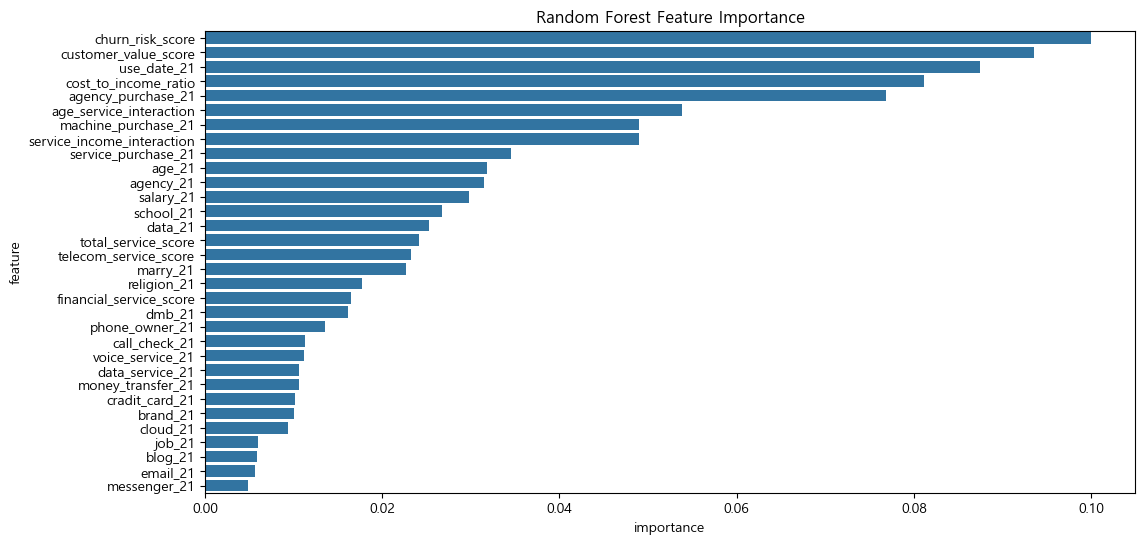

Random Forest 성능:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1353
           1       0.67      0.02      0.03       112

    accuracy                           0.92      1465
   macro avg       0.80      0.51      0.50      1465
weighted avg       0.91      0.92      0.89      1465

Random Forest 정확도: 0.9242



In [289]:
# 결측값을 0으로 채우기 (다른 방법이 있을시 변경)
phone_df[selected_features] = phone_df[selected_features].fillna(0)  #0으로 할 것인지 논의

# 데이터 X, y 설정
X = phone_df[selected_features]
y = ((phone_df['brand_21'] == 1) & (phone_df['brand_22'] != 1)).astype(int)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)

# Random Forest 특성 중요도 계산 및 정렬
importance_rf = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_clf.feature_importances_
}).sort_values('importance', ascending=False)

# Random Forest 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_rf, x='importance', y='feature')
plt.title('Random Forest Feature Importance')
plt.show()

# 결과 출력
classification_rep, rf_accuracy

print("Random Forest 성능:")
print(classification_rep)
print(f"Random Forest 정확도: {rf_accuracy:.4f}\n")

# ROC 시각화

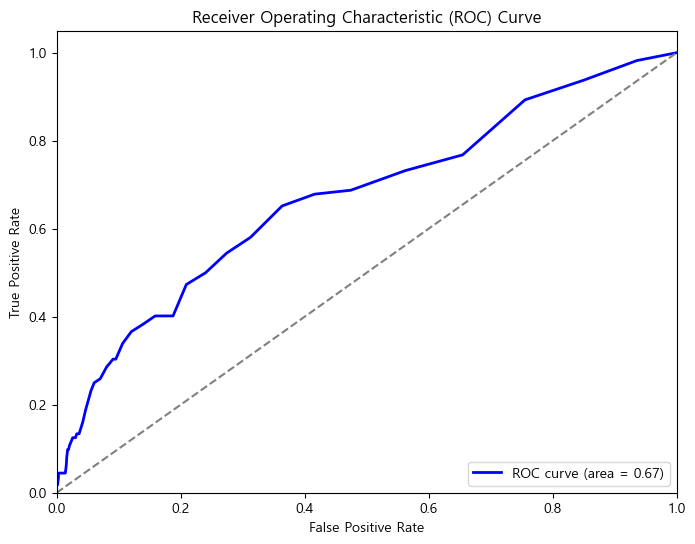

0.670157586316123

In [290]:
# ROC 커브 계산
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(rf_fpr,rf_tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr,rf_tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# AUC 값 출력
roc_auc


#  SMOTE 적용하여 오버샘플링 (이탈 고객 데이터 증강)

# 2. Gradient Boosting  활용  (전체 컬럼 + 파생 변수)

In [291]:
# SMOTE 적용하여 오버샘플링 (이탈 고객 데이터 증강)
smote = SMOTE(sampling_strategy=0.4, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)

# 파이프라인 구성 (SMOTE -> 언더샘플링)
resampling_pipeline = Pipeline([
    ('smote', smote),
    ('under', under)
])

# 데이터 변환
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# Random Forest 모델 다시 학습 (클래스 가중치 조정 추가)
rf_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_clf.fit(X_resampled, y_resampled)

# 예측 및 평가
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
classification_rep = classification_report(y_test, rf_pred)

# 결과 출력
print("Random Forest 성능 (SMOTE & 언더샘플링 적용):")
print(classification_rep)
print(f"Random Forest 정확도: {rf_accuracy:.4f}")

Random Forest 성능 (SMOTE & 언더샘플링 적용):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1353
           1       0.22      0.17      0.19       112

    accuracy                           0.89      1465
   macro avg       0.58      0.56      0.57      1465
weighted avg       0.88      0.89      0.88      1465

Random Forest 정확도: 0.8901


# 3. XGBoost (Extreme Gradient Boosting) (전체 컬럼 + 파생변수)

XGBoost 정확도: 0.9187713310580204


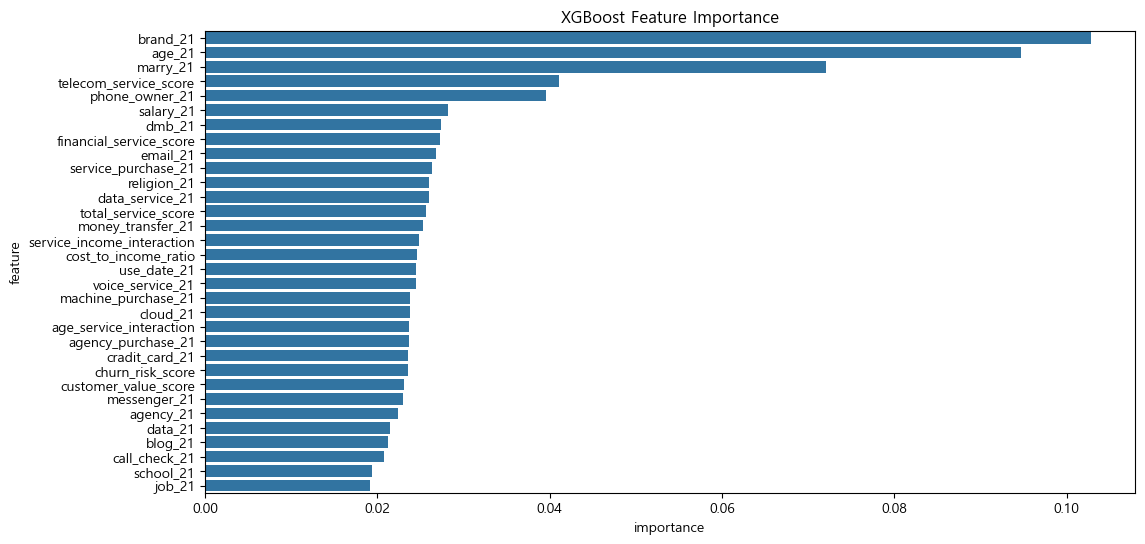

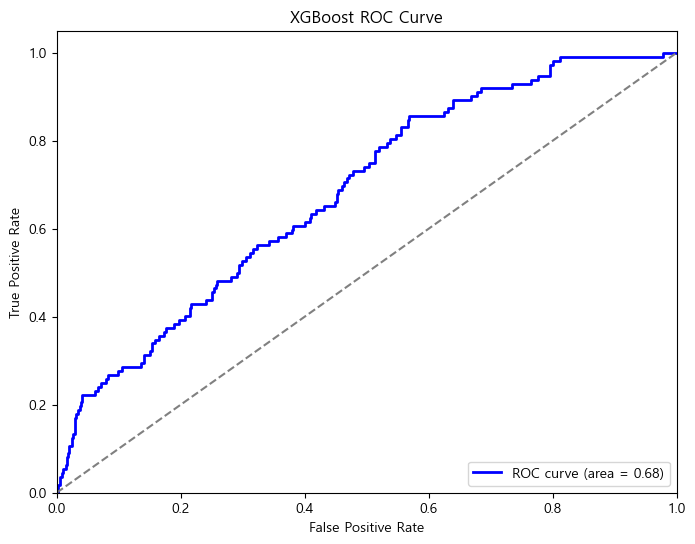

XGBoost 성능:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1353
           1       0.27      0.04      0.06       112

    accuracy                           0.92      1465
   macro avg       0.60      0.51      0.51      1465
weighted avg       0.88      0.92      0.89      1465

XGBoost 정확도: 0.9188


In [292]:
# XGBoost 모델 설정
xgb_clf = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

# 모델 학습
xgb_clf.fit(X_train, y_train)

# 예측 및 평가
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_classification_rep = classification_report(y_test, xgb_pred)
print("XGBoost 정확도:", xgb_accuracy)

# XGBoost 특성 중요도 계산 및 정렬
importance_gb = pd.DataFrame({
    'feature': selected_features,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False)


# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('XGBoost Feature Importance')
plt.show()

# ROC 커브 계산
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, color='blue', lw=2, label=f'ROC curve (area = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# XGBoost 성능 결과 출력
xgb_classification_rep, xgb_accuracy, xgb_roc_auc

# XGBoost 성능 출력
print("XGBoost 성능:")
print(xgb_classification_rep)
print(f"XGBoost 정확도: {xgb_accuracy:.4f}")

# 4. LightGBM (Light Gradient Boosting Machine) (전체 칼럼 + 파생변수)

[LightGBM] [Info] Number of positive: 418, number of negative: 5441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 5859, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.071343 -> initscore=-2.566237
[LightGBM] [Info] Start training from score -2.566237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

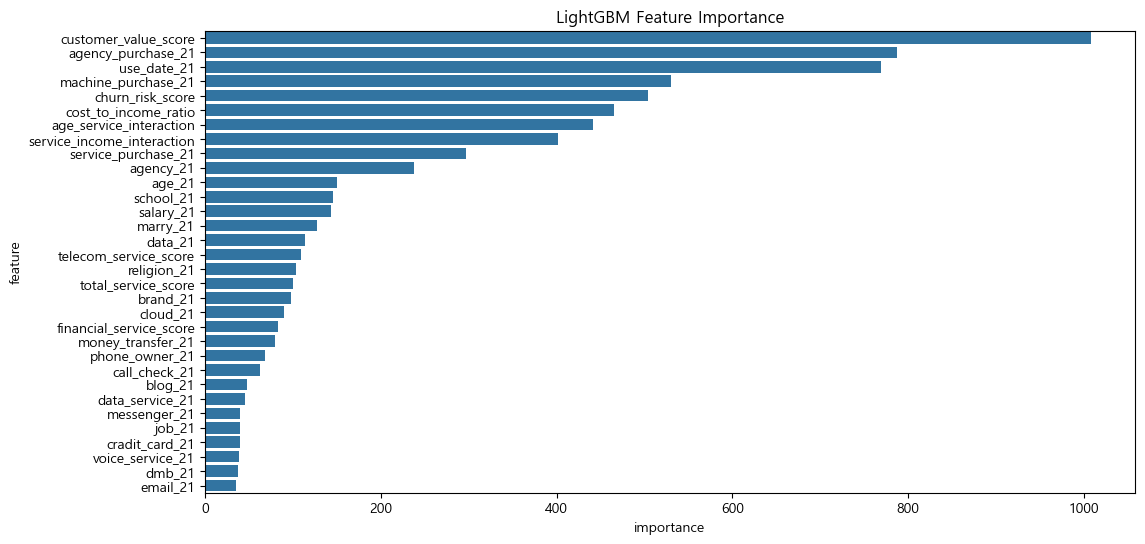

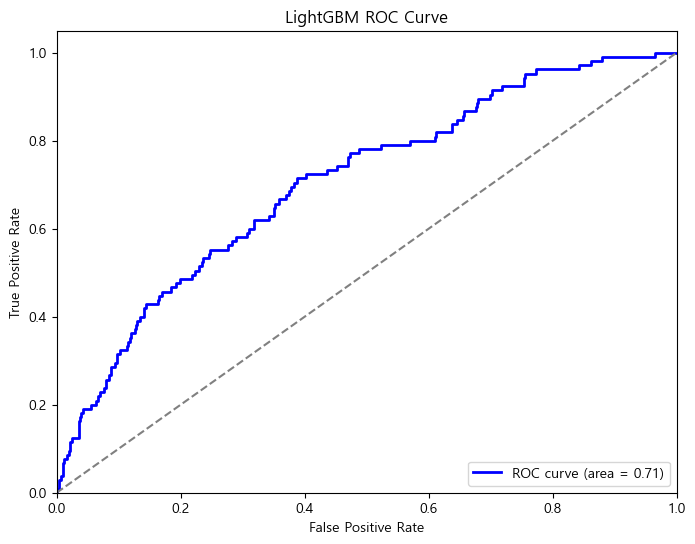

LightGBM 성능:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1353
           1       0.27      0.04      0.06       112

    accuracy                           0.92      1465
   macro avg       0.60      0.51      0.51      1465
weighted avg       0.88      0.92      0.89      1465

LightGBM 정확도: 0.9270


In [293]:
# 데이터 다시 분할 (필요할 경우)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# LightGBM 모델 설정
GBM_lgb_clf = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)

# 모델 학습
GBM_lgb_clf.fit(X_train, y_train)

# 예측 및 평가
GBM_lgb_pred = GBM_lgb_clf.predict(X_test)
GBM_lgb_accuracy = accuracy_score(y_test, GBM_lgb_pred)

# ✅ 수정된 코드: LightGBM 예측값을 사용하도록 변경
GBM_classification_rep = classification_report(y_test, GBM_lgb_pred)

print("LightGBM 정확도:", GBM_lgb_accuracy)
print("LightGBM 성능:")
print(GBM_classification_rep)

# LightGBM 특성 중요도 계산 및 정렬
importance_gb = pd.DataFrame({
    'feature': selected_features,
    'importance': GBM_lgb_clf.feature_importances_
}).sort_values('importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('LightGBM Feature Importance')
plt.show()

# ROC 커브 계산
GBM_fpr, GBM_tpr, _ = roc_curve(y_test, GBM_lgb_clf.predict_proba(X_test)[:, 1])
GBM_roc_auc = auc(GBM_fpr, GBM_tpr)

# ✅ 수정된 코드: `gb_roc_auc` -> `GBM_roc_auc`
plt.figure(figsize=(8, 6))
plt.plot(GBM_fpr, GBM_tpr, color='blue', lw=2, label=f'ROC curve (area = {GBM_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc="lower right")
plt.show()
# LightGBM 성능 결과 출력
xgb_classification_rep, GBM_lgb_accuracy, GBM_lgb_accuracy

# LightGBM 성능 출력
print("LightGBM 성능:")
print(xgb_classification_rep)
print(f"LightGBM 정확도: {GBM_lgb_accuracy:.4f}")


---

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8168\309720336.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')


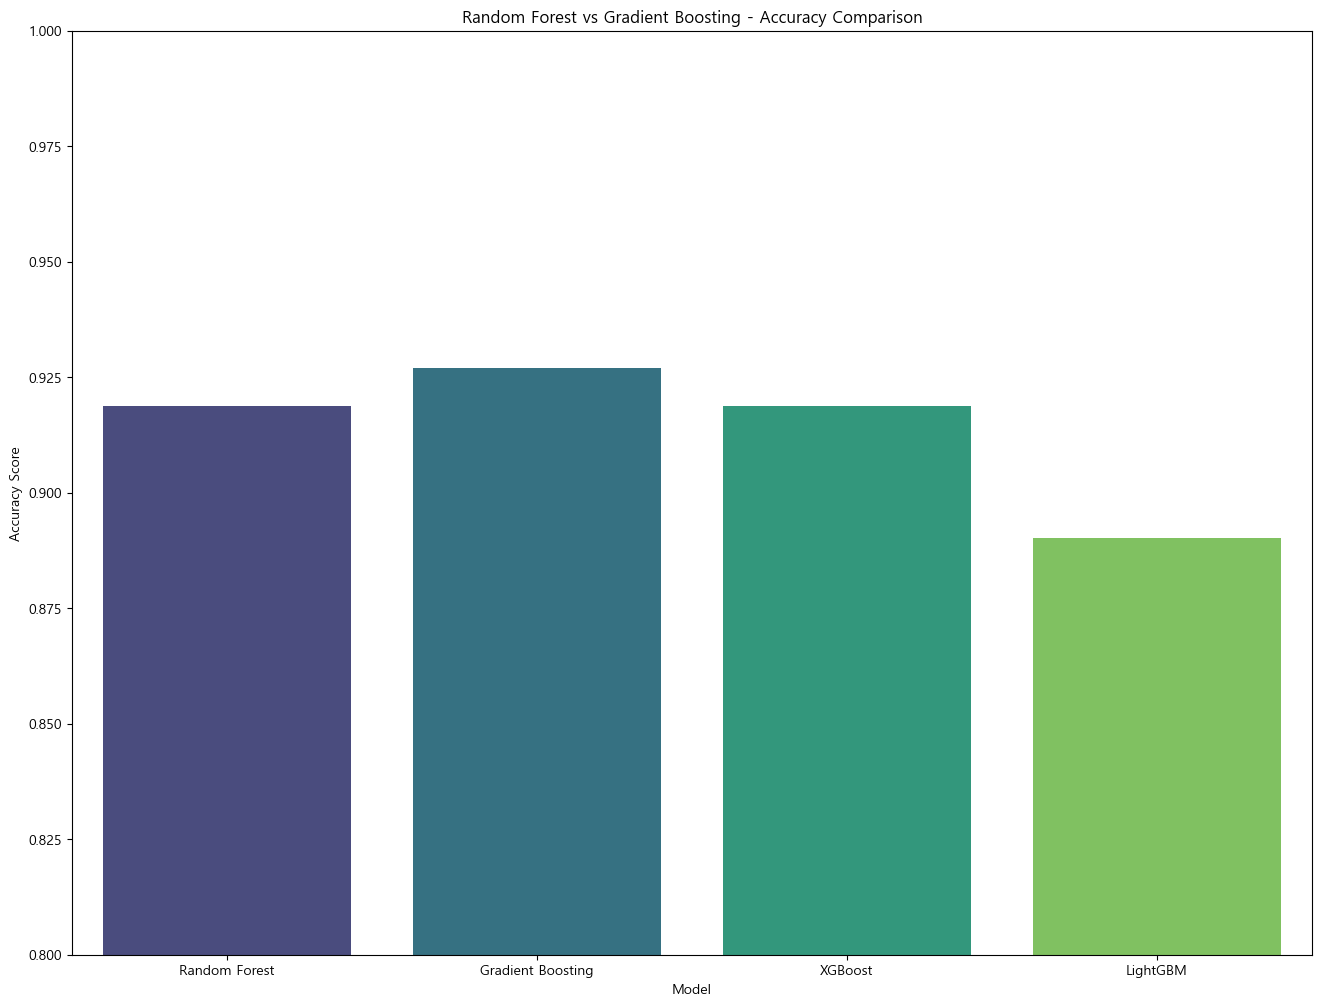

In [294]:
# 정확도 비교를 위한 데이터프레임 생성
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting','XGBoost', 'LightGBM'],
    'Accuracy': [xgb_accuracy, GBM_lgb_accuracy,xgb_accuracy,rf_accuracy]
})

# 정확도 비교 막대 그래프 시각화
plt.figure(figsize=(16, 12))
sns.barplot(data=model_comparison, x='Model', y='Accuracy', palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('Random Forest vs Gradient Boosting - Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1.0)  # 정확도 범위를 보기 좋게 조정
plt.show()

✅ 확인해야 하는 부분
- 특성 수가 줄어들면서 랜덤 포레스트의 정보 활용도가 떨어졌고, 이에 따라 정확도가 낮아졌을 가능성이 높음. 해결책으로는 Feature Selection 개선 및 하이퍼파라미터 튜닝이 필요함!

# 3년간 삼성 브랜드 사용자 제거 Gradient Boosting, Random Forest

### Gradient Boosting

In [295]:
# 데이터 불러오기
file_path = './data/phone_information.csv'
phone_df = pd.read_csv(file_path)


# 3년간 삼성 브랜드를 사용한 고객만 필터링
phone_df = phone_df[(phone_df['brand_21'] == 1) | 
                    (phone_df['brand_22'] == 1) | 
                    (phone_df['brand_23'] == 1)]

# 3년간 삼성 브랜드를 사용하지 않은 고객 제거
phone_df = phone_df[~((phone_df['brand_21'] == 0) & 
                       (phone_df['brand_22'] == 0) & 
                       (phone_df['brand_23'] == 0))]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8168\3809621497.py:3: DtypeWarning: Columns (29,33,34,35,36,37,38,39,40,41,42,53,57,58,59,60,61,62,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  phone_df = pd.read_csv(file_path)


In [296]:
# 데이터 전처리: 문자열을 정수형으로 변환
phone_df = phone_df.apply(pd.to_numeric, errors='coerce')

# NaN 값 처리: NaN 값을 0으로 채우기
phone_df.fillna(0, inplace=True)

# 범주형 변수 전처리
le = LabelEncoder()
categorical_features = ['service_purchase_21', 'money_transfer_21']

for feature in categorical_features:
    phone_df[feature] = le.fit_transform(phone_df[feature].astype(str))

# 상관 관계 분석
correlation_matrix = phone_df.corr()

# 상관 관계가 높은 상위 15개의 특성 선택 (이탈 여부와 가장 높은 상관 관계를 갖는 특성 선택)
target = 'brand_22'
correlation_with_target = correlation_matrix[target].drop(target)
top_15_features = correlation_with_target.abs().sort_values(ascending=False).head(15).index.tolist()

# 데이터 X, y
X = phone_df[top_15_features]
y = (phone_df['brand_22'] != 1).astype(int)  # 이탈자(1) 예측

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Gradient Boosting 성능:               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1265
           1       0.73      0.36      0.48       107

    accuracy                           0.94      1372
   macro avg       0.84      0.67      0.72      1372
weighted avg       0.93      0.94      0.93      1372

Gradient Boosting 정확도: 0.9395


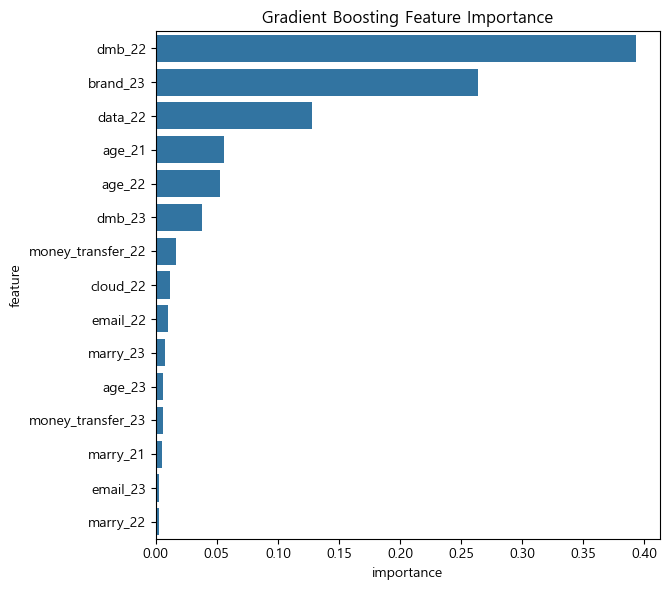

In [297]:
# Gradient Boosting 모델 학습
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 평가
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f"Gradient Boosting 성능: {classification_report(y_test, gb_pred)}")
print(f"Gradient Boosting 정확도: {gb_accuracy:.4f}")

# Gradient Boosting 특성 중요도
plt.figure(figsize=(12, 6))
importance_gb = pd.DataFrame({
    'feature': top_15_features,
    'importance': gb_clf.feature_importances_
})
importance_gb = importance_gb.sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
sns.barplot(data=importance_gb, x='importance', y='feature')
plt.title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()